<a href="https://colab.research.google.com/github/bardiaHSZD/Algorithms_DataStructure/blob/main/Leetcode_Problems_Set_VIII_Meta_75_Coding_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Curated List of [Top 75](https://www.teamblind.com/post/New-Year-Gift---Curated-List-of-Top-75-LeetCode-Questions-to-Save-Your-Time-OaM1orEU?fbclid=IwAR1Wl1Y_sPLzVwQQjigju9402qE6pSDZP3e7vhLqn2tpbxnK4KTBKH5iBIc) LeetCode Questions to Save Your Time**

Here is a list of the best LeetCode questions that teach you core concepts and techniques for each category/type of problems! Many other LeetCode questions are a mash of the techniques from these individual questions. I used this list in my last job hunt to only do the important questions.

##**Array**

- Two Sum - https://leetcode.com/problems/two-sum/
- Best Time to Buy and Sell Stock - https://leetcode.com/problems/best-time-to-buy-and-sell-stock/
- Contains Duplicate - https://leetcode.com/problems/contains-duplicate/
- Product of Array Except Self - https://leetcode.com/problems/product-of-array-except-self/
- Maximum Subarray - https://leetcode.com/problems/maximum-subarray/
- Maximum Product Subarray - https://leetcode.com/problems/maximum-product-subarray/
- Find Minimum in Rotated Sorted Array - https://leetcode.com/problems/find-minimum-in-rotated-sorted-array/
- Search in Rotated Sorted Array - https://leetcode.com/problems/search-in-rotated-sorted-array/
- 3Sum - https://leetcode.com/problems/3sum/
- Container With Most Water - https://leetcode.com/problems/container-with-most-water/

##**Binary**

- Sum of Two Integers - https://leetcode.com/problems/sum-of-two-integers/
- Number of 1 Bits - https://leetcode.com/problems/number-of-1-bits/
- Counting Bits - https://leetcode.com/problems/counting-bits/
- Missing Number - https://leetcode.com/problems/missing-number/
- Reverse Bits - https://leetcode.com/problems/reverse-bits/

##**Dynamic Programming**

- Climbing Stairs - https://leetcode.com/problems/climbing-stairs/
- Coin Change - https://leetcode.com/problems/coin-change/
- Longest Increasing Subsequence - https://leetcode.com/problems/longest-increasing-subsequence/
- Longest Common Subsequence -
- Word Break Problem - https://leetcode.com/problems/word-break/
- Combination Sum - https://leetcode.com/problems/combination-sum-iv/
- House Robber - https://leetcode.com/problems/house-robber/
- House Robber II - https://leetcode.com/problems/house-robber-ii/
- Decode Ways - https://leetcode.com/problems/decode-ways/
- Unique Paths - https://leetcode.com/problems/unique-paths/
- Jump Game - https://leetcode.com/problems/jump-game/

##**Graph**

- Clone Graph - https://leetcode.com/problems/clone-graph/
- Course Schedule - https://leetcode.com/problems/course-schedule/
- Pacific Atlantic Water Flow - https://leetcode.com/problems/pacific-atlantic-water-flow/
- Number of Islands - https://leetcode.com/problems/number-of-islands/
- Longest Consecutive Sequence - https://leetcode.com/problems/longest-consecutive-sequence/
- Alien Dictionary (Leetcode Premium) - https://leetcode.com/problems/alien-dictionary/
- Graph Valid Tree (Leetcode Premium) - https://leetcode.com/problems/graph-valid-tree/
- Number of Connected Components in an Undirected Graph (Leetcode Premium) - https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph/


### **Leetcode problem 133: Clone Graph - https://leetcode.com/problems/clone-graph**

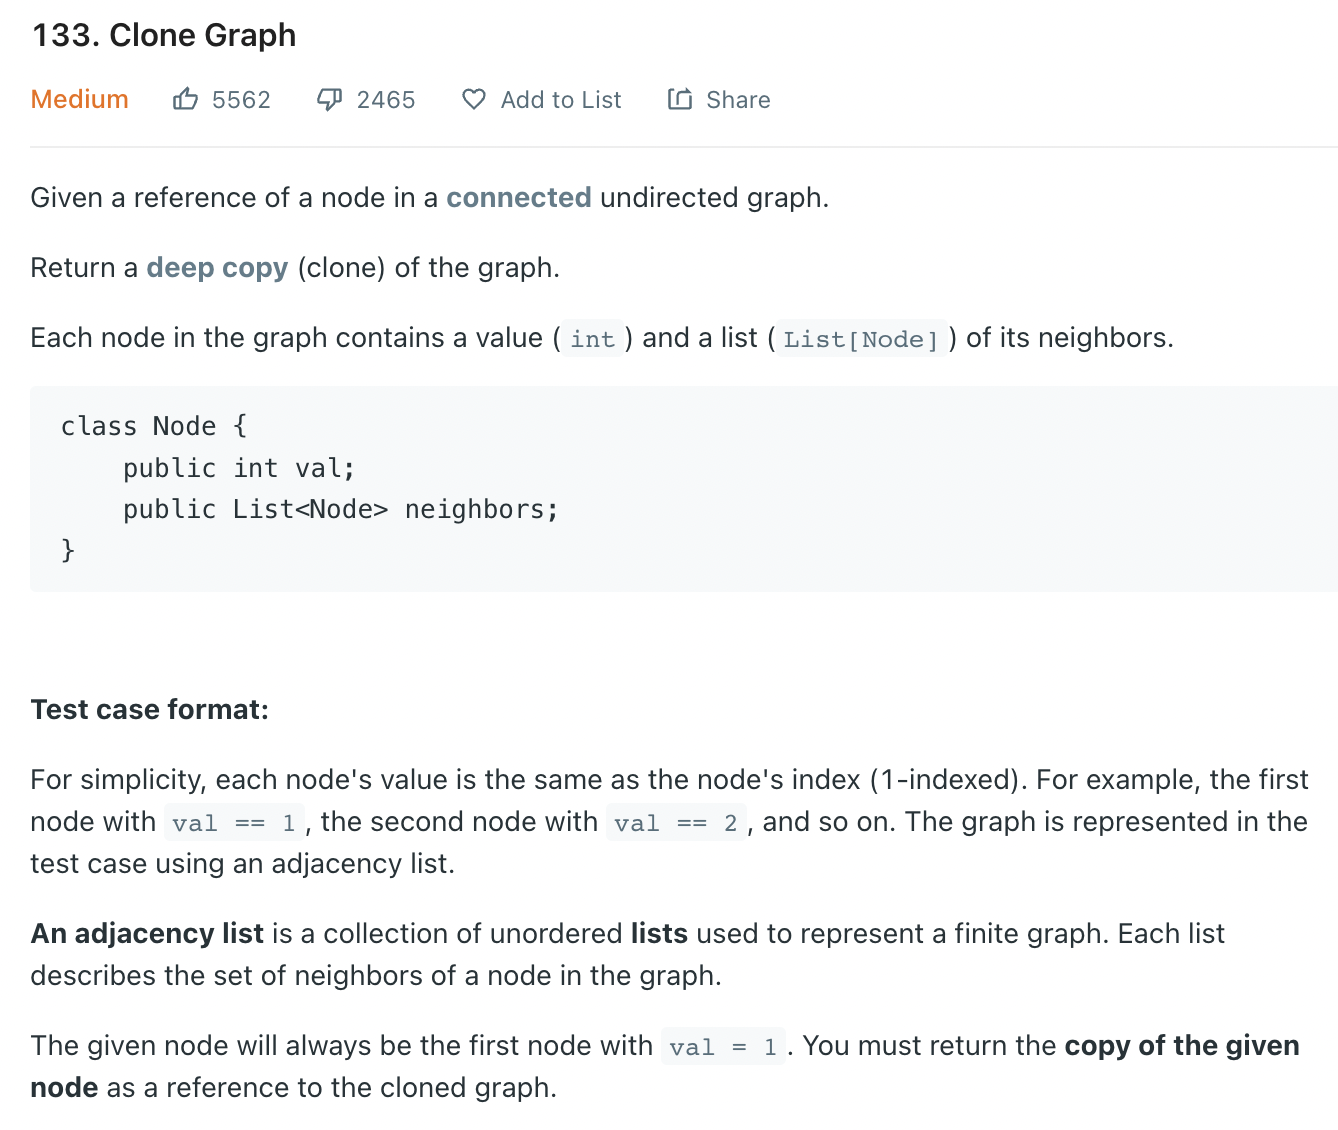

In [ ]:
"""
# Definition for a Node.
class Node(object):
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []
"""
from collections import defaultdict

class Solution(object):
    def cloneGraph(self, node):
        """
        :type node: Node
        :rtype: Node
        """
        if node is None:
            return None
        else:
            # BFS: identify node values
            visited = set()
            queue = [node]

            while queue:
                tmpNode = queue.pop(0)
                visited.add(tmpNode.val)
                for neighbor in tmpNode.neighbors:
                    if neighbor.val not in visited:
                        queue.append(neighbor)
            print(visited) #Nodes
            
            deepCopy = defaultdict(list)
            for value in visited:
                deepCopy[value] = Node(value)
                
            # BFS: deepCopy neighbors
            visited = set()
            queue = [node]

            while queue:
                tmpNode = queue.pop(0)
                visited.add(tmpNode.val)
                deepCopy[tmpNode.val].neighbors = [deepCopy[neighbor.val] for neighbor in tmpNode.neighbors]
                for neighbor in tmpNode.neighbors:
                    if neighbor.val not in visited:
                        queue.append(neighbor)                           
            return deepCopy[node.val]

### **Leetcode problem 207: Course Schedule - https://leetcode.com/problems/course-schedule/**

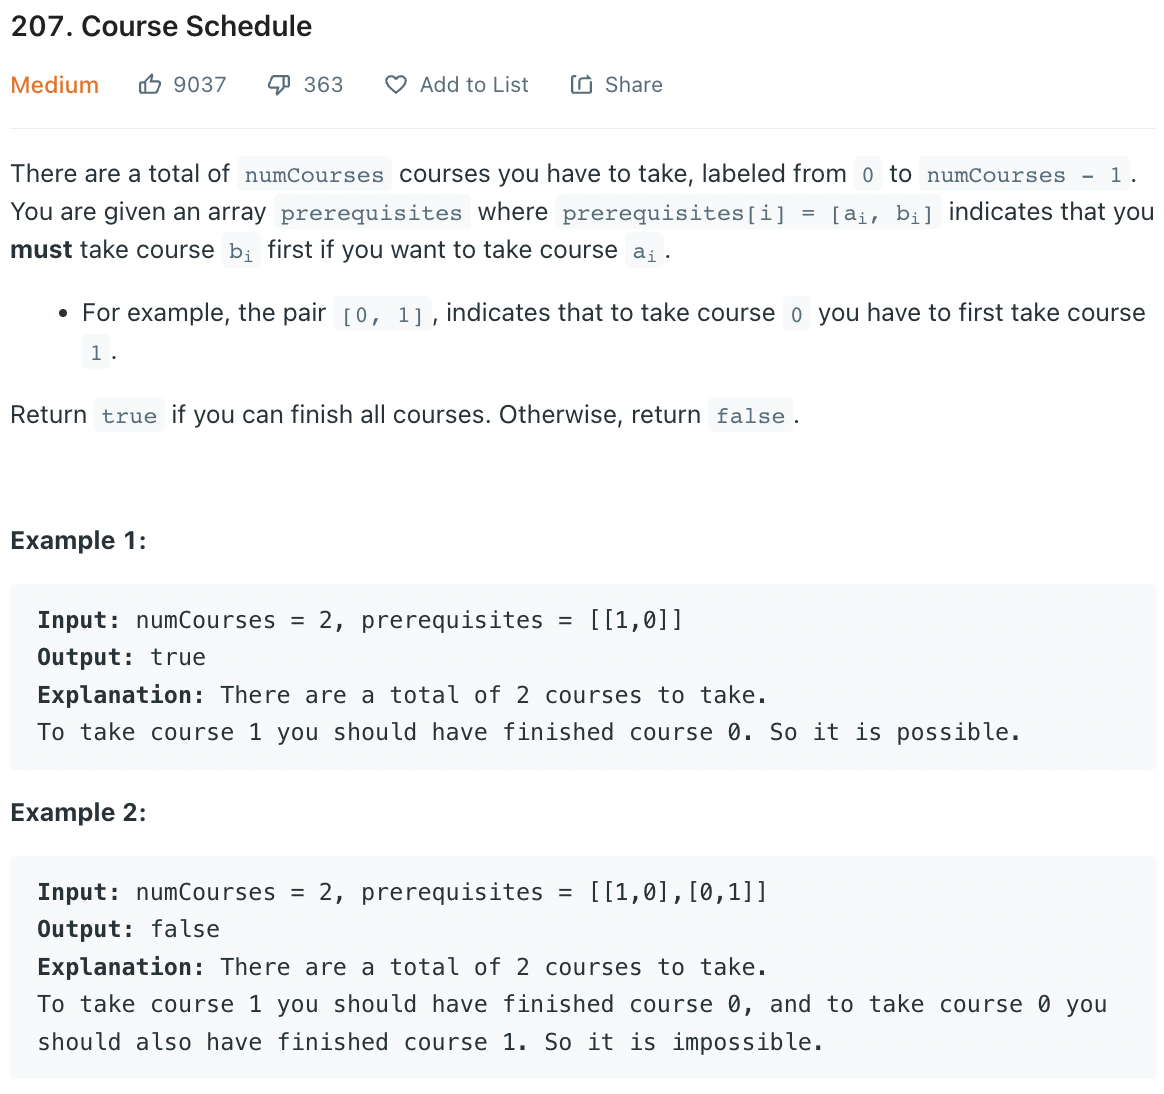

In [ ]:
from collections import defaultdict
class Graph(object):
    def __init__(self, vertices):
        self.graph = defaultdict(list)
        self.V = vertices
    
    def addEdge(self, u, v):
        self.graph[u].append(v)
    
    def topologicalSortUtil(self, v, visited, stack):
        visited[v] = True
        for i in self.graph[v]:
            if visited[i] == False:
                self.topologicalSortUtil(i, visited, stack)        
        stack.append(v)
        
    def topologicalSort(self):
        visited = [False]*self.V
        stack = []
        for i in range(self.V):
            if visited[i] == False:
                self.topologicalSortUtil(i, visited, stack)
                
        return stack[::-1]     
    
class Solution(object):
    
    def canFinish(self, numCourses, prerequisites):
        """
        :type numCourses: int
        :type prerequisites: List[List[int]]
        :rtype: bool
        """
        g = Graph(numCourses)
        for coursePair in prerequisites:
            g.addEdge(coursePair[1], coursePair[0])
        sortedCourses = list(g.topologicalSort())
        print(sortedCourses)
        result = True
        for coursePair in prerequisites:
            if sortedCourses.index(coursePair[1]) >= sortedCourses.index(coursePair[0]):
                result = False
                
        return result        

### **Leetcode problem 417: Pacific Atlantic Water Flow - https://leetcode.com/problems/pacific-atlantic-water-flow/**

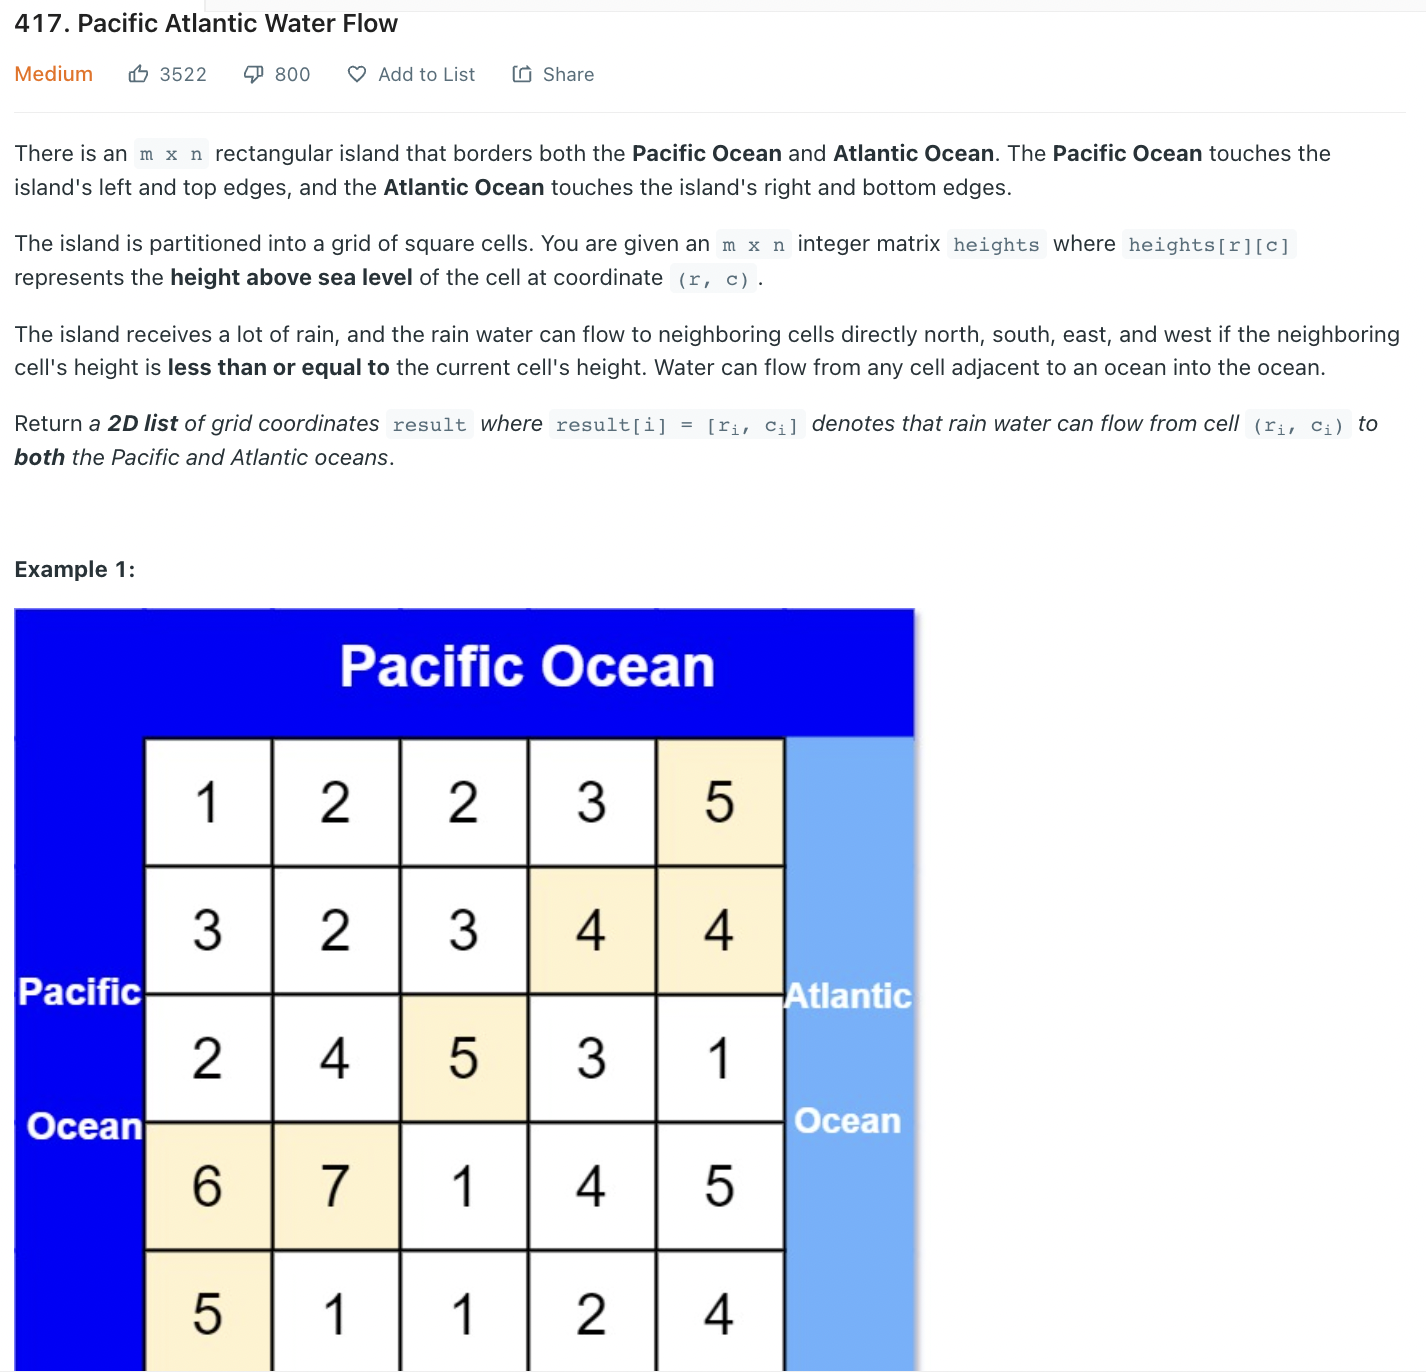

In [ ]:
class Solution(object):
    def pacificAtlantic(self, heights):
        """
        :type heights: List[List[int]]
        :rtype: List[List[int]]
        """
        M = heights
        if not M or not M[0]: return []
        
        m, n = len(M[0]), len(M)
        def bfs(starts):
            queue = deque(starts)
            visited = set(starts)
            while queue:
                x, y = queue.popleft()
                for dx, dy in [(x, y+1), (x, y-1), (x-1, y), (x+1, y)]:
                    if 0 <= dx < n and 0 <= dy < m and (dx, dy) not in visited and M[dx][dy] >= M[x][y]:
                        queue.append((dx, dy))
                        visited.add((dx, dy))
                        
            return visited
        
        pacific  = [(0, i) for i in range(m)]   + [(i, 0) for i in range(1,n)]
        atlantic = [(n-1, i) for i in range(m)] + [(i, m-1) for i in range(n-1)]
        
        return bfs(pacific) & bfs(atlantic)

### **Leetcode problem 200: Number of Islands - https://leetcode.com/problems/number-of-islands/**

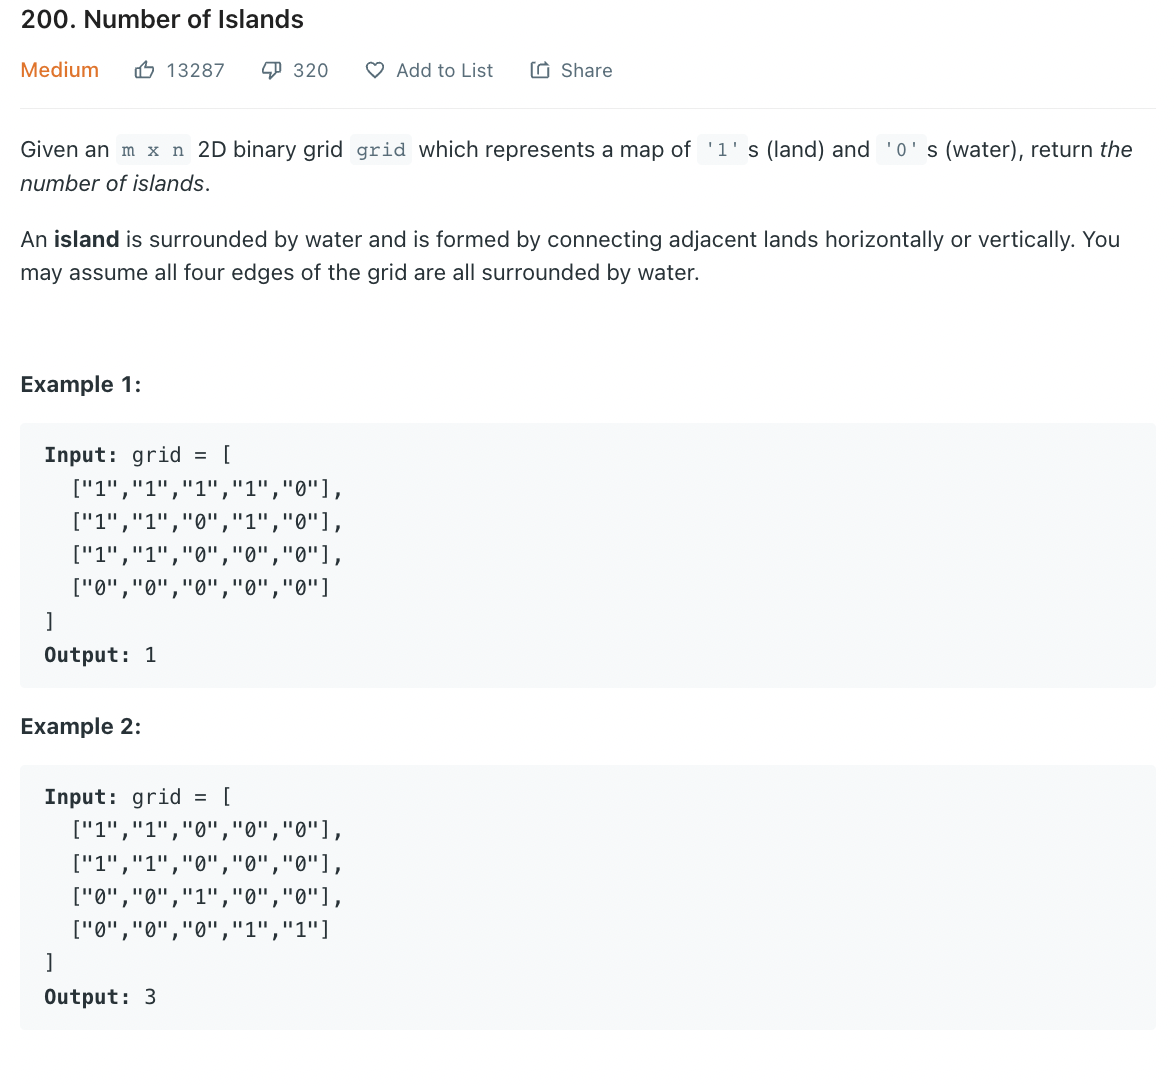

In [ ]:
import collections

class Solution(object):
    
    def numIslands(self, grid):
        """
        :type grid: List[List[str]]
        :rtype: int
        """
        if not grid:
            return
        rows, cols = len(grid), len(grid[0])
        visited = set()
        islands = 0
        
        def bfs(r, c):
            q = deque()
            visited.add((r,c))
            q.append((r,c))
            
            while q:
                row, col = q.popleft() #to change to DFS: q.pop() 
                directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
                for dr, dc in directions:
                    r, c = row + dr, col + dc
                    if (r in range(rows) and
                       c in range(cols) and
                       grid[r][c] == '1' and 
                       (r,c) not in visited):
                            visited.add((r,c))
                            q.append((r,c))
                        
        for r in range(rows):
            for c in range(cols):
                if grid[r][c] == '1' and (r,c) not in visited:
                    bfs(r, c)
                    islands += 1
        return islands 

### **Leetcode problem 128: Longest Consecutive Sequence - https://leetcode.com/problems/longest-consecutive-sequence/**

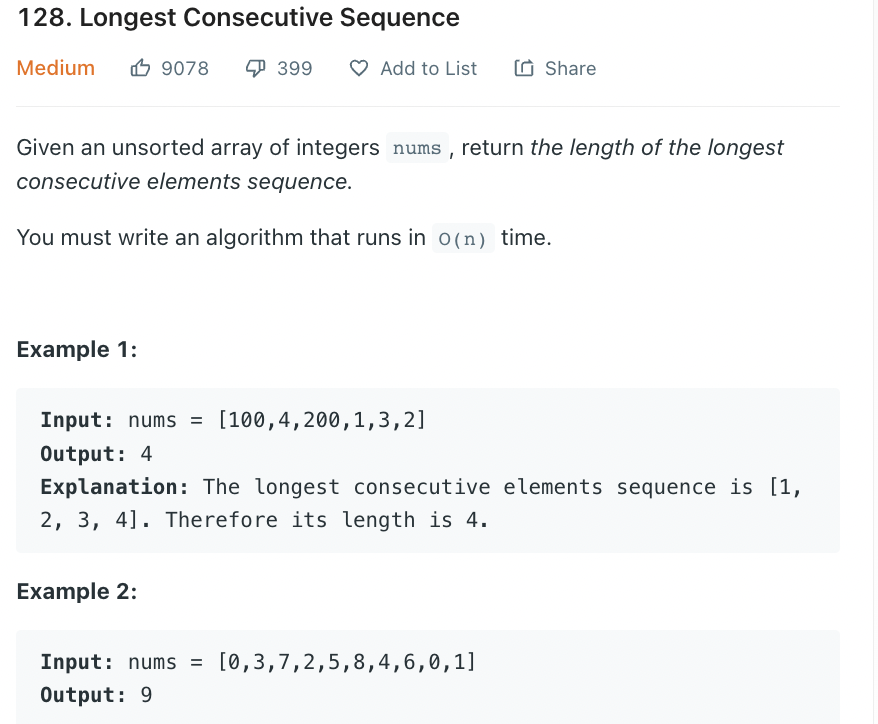

In [ ]:
import numpy as np
class Solution(object):
    def longestConsecutive(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        num=set(nums)
        maxLen=0
        while num:
            n=num.pop()
            i=n+1
            l1=0
            l2=0
            while i in num:
                num.remove(i)
                i+=1
                l1+=1
            i=n-1
            while i in num:
                num.remove(i)
                i-=1
                l2+=1
            maxLen=max(maxLen,l1+l2+1)
        return maxLen

##**Interval**

- Insert Interval - https://leetcode.com/problems/insert-interval/
- Merge Intervals - https://leetcode.com/problems/merge-intervals/
- Non-overlapping Intervals - https://leetcode.com/problems/non-overlapping-intervals/
- Meeting Rooms (Leetcode Premium) - https://leetcode.com/problems/meeting-rooms/
- Meeting Rooms II (Leetcode Premium) - https://leetcode.com/problems/meeting-rooms-ii/

##**Linked List**

- Reverse a Linked List - https://leetcode.com/problems/reverse-linked-list/
- Detect Cycle in a Linked List - https://leetcode.com/problems/linked-list-cycle/
- Merge Two Sorted Lists - https://leetcode.com/problems/merge-two-sorted-lists/
- Merge K Sorted Lists - https://leetcode.com/problems/merge-k-sorted-lists/
- Remove Nth Node From End Of List - https://leetcode.com/problems/remove-nth-node-from-end-of-list/
- Reorder List - https://leetcode.com/problems/reorder-list/


##**Matrix**

- Set Matrix Zeroes - https://leetcode.com/problems/set-matrix-zeroes/
- Spiral Matrix - https://leetcode.com/problems/spiral-matrix/
- Rotate Image - https://leetcode.com/problems/rotate-image/
- Word Search - https://leetcode.com/problems/word-search/

##**String**

- Longest Substring Without Repeating Characters - https://leetcode.com/problems/longest-substring-without-repeating-characters/
- Longest Repeating Character Replacement - https://leetcode.com/problems/longest-repeating-character-replacement/
- Minimum Window Substring - https://leetcode.com/problems/minimum-window-substring/
- Valid Anagram - https://leetcode.com/problems/valid-anagram/
- Group Anagrams - https://leetcode.com/problems/group-anagrams/
- Valid Parentheses - https://leetcode.com/problems/valid-parentheses/
- Valid Palindrome - https://leetcode.com/problems/valid-palindrome/
- Longest Palindromic Substring - https://leetcode.com/problems/longest-palindromic-substring/
- Palindromic Substrings - https://leetcode.com/problems/palindromic-substrings/
- Encode and Decode Strings (Leetcode Premium) - https://leetcode.com/problems/encode-and-decode-strings/

##**Tree**

- Maximum Depth of Binary Tree - https://leetcode.com/problems/maximum-depth-of-binary-tree/
- Same Tree - https://leetcode.com/problems/same-tree/
- Invert/Flip Binary Tree - https://leetcode.com/problems/invert-binary-tree/
- Binary Tree Maximum Path Sum - https://leetcode.com/problems/binary-tree-maximum-path-sum/
- Binary Tree Level Order Traversal - https://leetcode.com/problems/binary-tree-level-order-traversal/
- Serialize and Deserialize Binary Tree - https://leetcode.com/problems/serialize-and-deserialize-binary-tree/
- Subtree of Another Tree - https://leetcode.com/problems/subtree-of-another-tree/
- Construct Binary Tree from Preorder and Inorder Traversal - https://leetcode.com/problems/construct-binary-tree-from-preorder-and-inorder-traversal/
- Validate Binary Search Tree - https://leetcode.com/problems/validate-binary-search-tree/
- Kth Smallest Element in a BST - https://leetcode.com/problems/kth-smallest-element-in-a-bst/
- Lowest Common Ancestor of BST - https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-search-tree/
- Implement Trie (Prefix Tree) - https://leetcode.com/problems/implement-trie-prefix-tree/
- Add and Search Word - https://leetcode.com/problems/add-and-search-word-data-structure-design/
- Word Search II - https://leetcode.com/problems/word-search-ii/

### **Leetcode problem 104: Maximum Depth of Binary Tree - https://leetcode.com/problems/maximum-depth-of-binary-tree/**

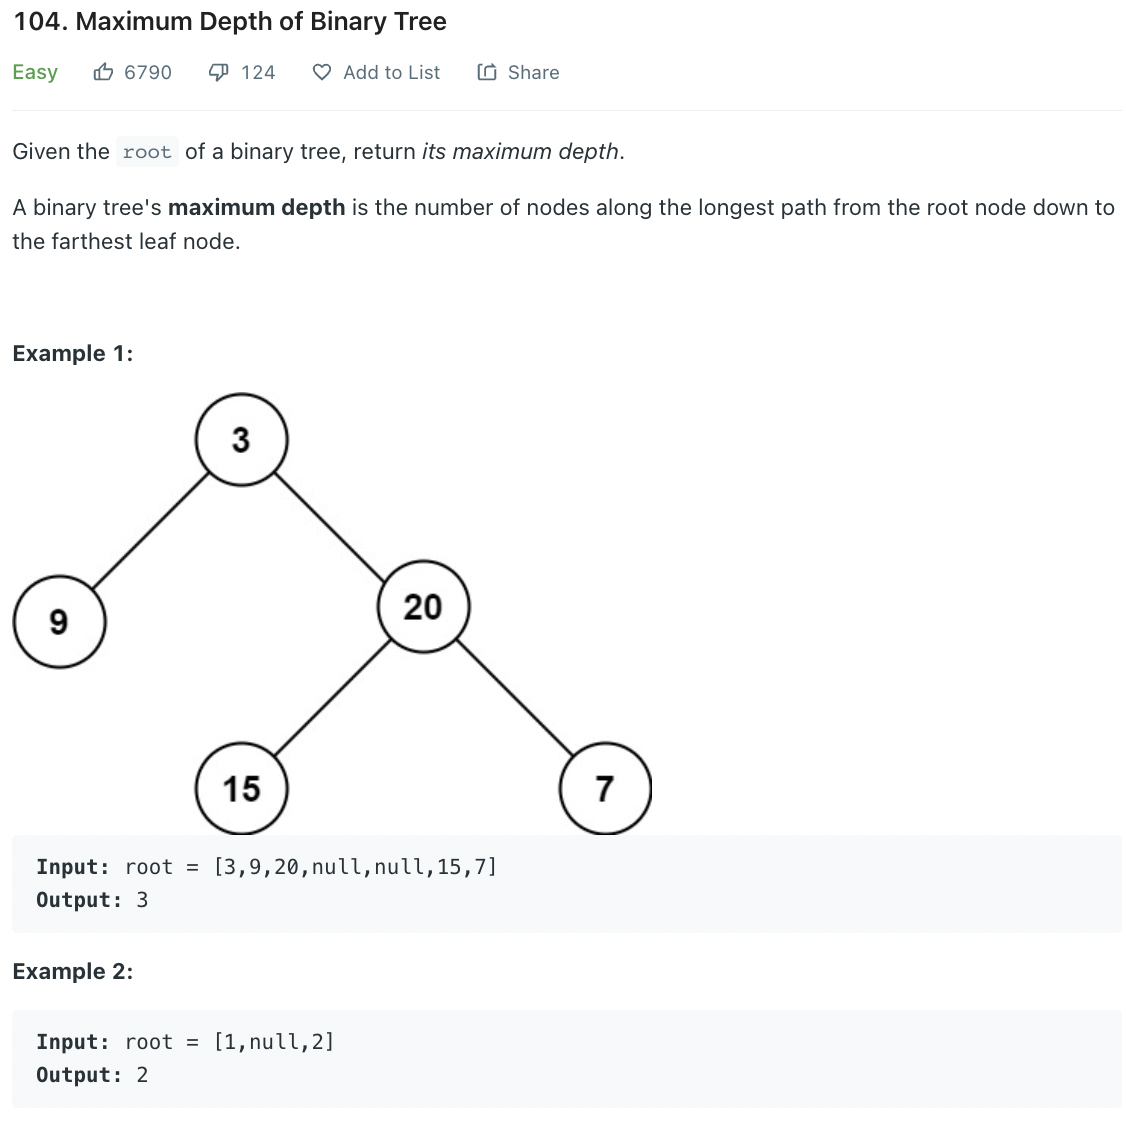

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution(object):
    def maxDepth(self, root):
        """
        :type root: TreeNode
        :rtype: int
        """
        def helper(root):
            if root is None:
                return -1 ;

            else :

                # Compute the depth of each subtree
                lDepth = helper(root.left)
                rDepth = helper(root.right)

                # Use the larger one
                if (lDepth > rDepth):
                    return lDepth+1
                else:
                    return rDepth+1
                    
        return helper(root) + 1   

### **Leetcode problem 100: Same Tree - https://leetcode.com/problems/same-tree/**

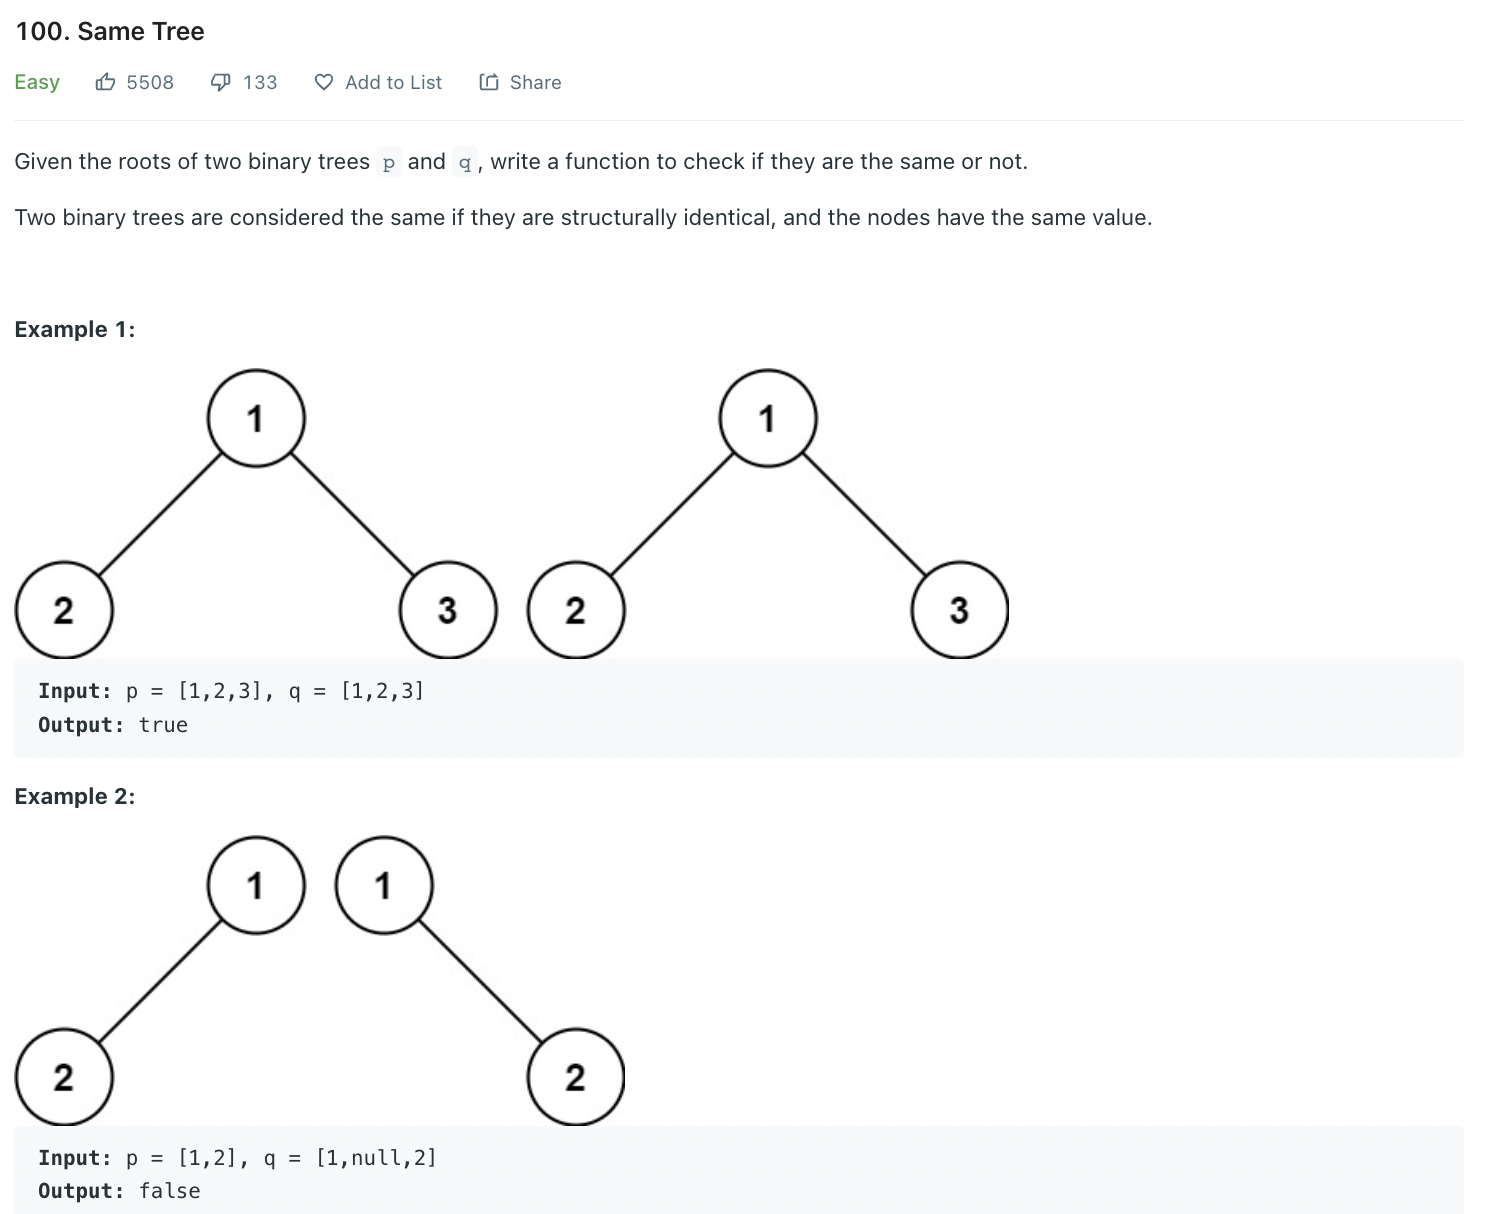

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution(object):
    def isSameTree(self, p, q):
        """
        :type p: TreeNode
        :type q: TreeNode
        :rtype: bool
        """
        def helper(root):
            
            if root is None:
                return None
            result = []

            queue = collections.deque()
            queue.append(root)
            result.append(root.val)

            while(len(queue) > 0):

                node = queue.popleft()

                if node.left is not None:
                    queue.append(node.left)
                    result.append(node.left.val) 
                else: result.append(None)    

                if node.right is not None:
                    queue.append(node.right)
                    result.append(node.right.val) 
                else: result.append(None) 
            return result
        
        result_p = helper(p)  
        result_q = helper(q)  
        
        return result_p == result_q

### **Leetcode problem 102: Binary Tree Level Order Traversal - https://leetcode.com/problems/binary-tree-level-order-traversal/**

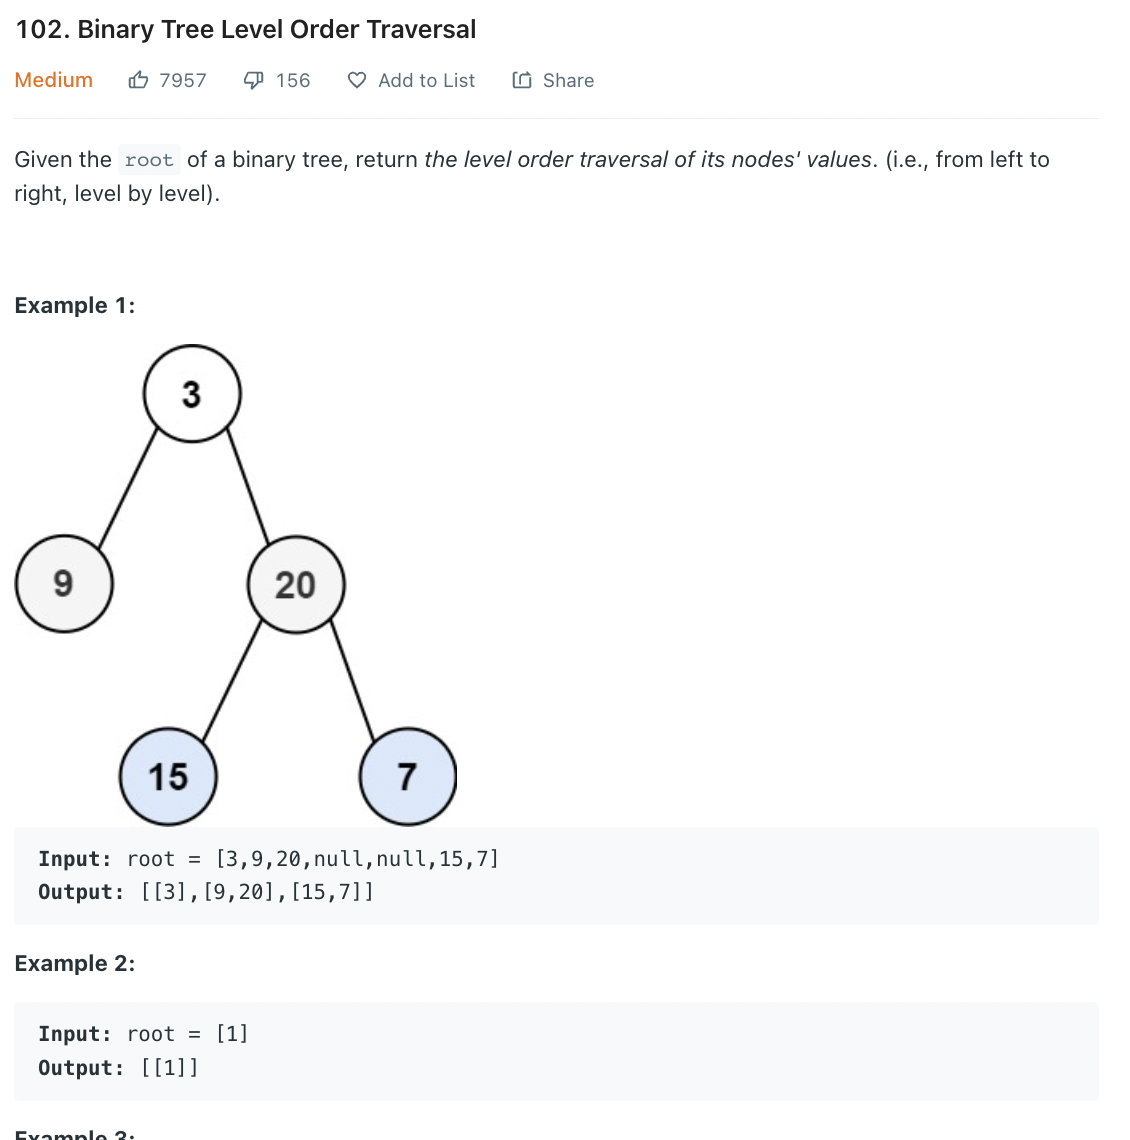

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution(object):
    def levelOrder(self, root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        

        if root is None:
            return None
        else:
            result = []
            q = collections.deque()
            q.append(root)
            
            while len(q):
                level = []
                for i in range(len(q)):
                    rootNode = q.popleft()
                    level.append(rootNode.val)
                    if rootNode.left:
                        q.append(rootNode.left)
                    if rootNode.right:
                        q.append(rootNode.right)
                result.append(level)    
            return result                

##**Heap**

- Merge K Sorted Lists - https://leetcode.com/problems/merge-k-sorted-lists/
- Top K Frequent Elements - https://leetcode.com/problems/top-k-frequent-elements/
- Find Median from Data Stream - https://leetcode.com/problems/find-median-from-data-stream/